In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
#Function that tell which one is the key
def keyColumn(tableList):
    for df in tableList:
        key=np.argmax([len(df[columns].unique()) for columns in df.columns])
        print(df.columns[key])

## <span style="color: blue; font-size: 1em;"> Problem 1 (Hypothesis test):  Assume that we do not know a lot about the population (GPA for each class at University of Wisconsin, Madison in 10 years), except for its $\mu$ and $\sigma$. We randomly asked 50 professors who teach classes in the early morning (start between 6:00AM to 8:00 AM) for their class GPA average in the period of 10 years.
* Is the GPA in the morning less than the GPA in the evening? Given the significant level to be 0.1. 
* What is our statistical power?</span>

### Bussiness perspective: Should taking class in the morning affect your GPA?


### 1) Pre-processing : 
#### Source: schedules, sections ,grade_distributions
#### Obtain: Dataframe with GPA average, population mean and standard deviation, sample pool for class in the morning

In [4]:
schedules=pd.read_csv("uw-madison-courses/schedules.csv")
sections=pd.read_csv("uw-madison-courses/sections.csv")
grade_distributions=pd.read_csv("uw-madison-courses/grade_distributions.csv")

In [5]:
#Clean schedule
day_of_week=['mon','tues','wed','thurs','fri','sat','sun']
schedules=schedules.dropna()
schedules=schedules[(schedules['start_time']!=-1)&(schedules['end_time']!=-1)]
schedules=schedules.drop(day_of_week,axis=1)
schedules=schedules.rename(columns={"uuid": "schedule_uuid"})

#Clean sections
sections=sections.drop(['section_type','room_uuid','number'],axis=1) #Default(axis=0) drop row, axis=1 drop collumn
sections=sections.rename(columns={"uuid":"section_uuid"})

#Clean grade_distribution
grade_distributions=grade_distributions.drop(['s_count','u_count','cr_count','n_count','p_count','i_count','nw_count','nr_count','other_count'],axis=1)
grade_distributions=grade_distributions.dropna()


In [6]:
print('Schedule:\t\t {}\nSection:\t\t{}\nGrade Distribution:\t{} '.format(len(schedules),len(sections),len(grade_distributions)))

Schedule:		 4448
Section:		315602
Grade Distribution:	193262 


In [7]:
df=pd.DataFrame({})
#Combine schedules and sections to df_temp1
df_temp1=schedules.merge(sections, on='schedule_uuid')
#Combine Grade Dist and df_temp1 to df
df=df_temp1.merge(grade_distributions, on='course_offering_uuid')

#GPA Average
GPA=0
total=df['a_count']+df['ab_count']+df['b_count']+df['bc_count']+df['c_count']+df['d_count']+df['f_count']
df=df[total!=0]
GPA=(df['a_count']*4+df['ab_count']*3.5+df['b_count']*3+df['bc_count']*2.5+df['c_count']*2+df['d_count']*1)/total
num_student=list(total[total!=0])
df['GPA']=GPA
df['Num_student']=num_student
print(len(df))
df.head()

707078


,schedule_uuid,start_time,end_time,section_uuid,course_offering_uuid,section_number,a_count,ab_count,b_count,bc_count,c_count,d_count,f_count,GPA,Num_student
0,875542a2-f786-34dd-933b-84a8af1aaaba,530,580,63901cc2-3622-3b12-a368-af005e9ad526,a71789f0-09d9-3374-bd21-04a719a62af8,1,46,0,0,0,0,0,0,4.000000,46
1,875542a2-f786-34dd-933b-84a8af1aaaba,530,580,63901cc2-3622-3b12-a368-af005e9ad526,a71789f0-09d9-3374-bd21-04a719a62af8,2,41,0,0,0,0,0,0,4.000000,41
2,875542a2-f786-34dd-933b-84a8af1aaaba,530,580,63901cc2-3622-3b12-a368-af005e9ad526,a71789f0-09d9-3374-bd21-04a719a62af8,3,13,5,1,0,0,0,0,3.815789,19
3,875542a2-f786-34dd-933b-84a8af1aaaba,530,580,63901cc2-3622-3b12-a368-af005e9ad526,a71789f0-09d9-3374-bd21-04a719a62af8,4,11,6,2,0,0,0,0,3.736842,19
4,f41f1e4d-cb4f-3ded-b4b0-4a7c4da044e5,660,710,932ca58e-bef5-3dce-b42e-e14060984125,a71789f0-09d9-3374-bd21-04a719a62af8,1,46,0,0,0,0,0,0,4.000000,46


In [18]:
#Find mean and std
mu=round(df['GPA'].mean(),3)
std=round(df['GPA'].std(),3)
print("mu :",mu)
print("std :", std)

mu : 3.371
std : 0.392


In [19]:
df.head()

,schedule_uuid,start_time,end_time,section_uuid,course_offering_uuid,section_number,a_count,ab_count,b_count,bc_count,c_count,d_count,f_count,GPA,Num_student
0,875542a2-f786-34dd-933b-84a8af1aaaba,530,580,63901cc2-3622-3b12-a368-af005e9ad526,a71789f0-09d9-3374-bd21-04a719a62af8,1,46,0,0,0,0,0,0,4.000000,46
1,875542a2-f786-34dd-933b-84a8af1aaaba,530,580,63901cc2-3622-3b12-a368-af005e9ad526,a71789f0-09d9-3374-bd21-04a719a62af8,2,41,0,0,0,0,0,0,4.000000,41
2,875542a2-f786-34dd-933b-84a8af1aaaba,530,580,63901cc2-3622-3b12-a368-af005e9ad526,a71789f0-09d9-3374-bd21-04a719a62af8,3,13,5,1,0,0,0,0,3.815789,19
3,875542a2-f786-34dd-933b-84a8af1aaaba,530,580,63901cc2-3622-3b12-a368-af005e9ad526,a71789f0-09d9-3374-bd21-04a719a62af8,4,11,6,2,0,0,0,0,3.736842,19
4,f41f1e4d-cb4f-3ded-b4b0-4a7c4da044e5,660,710,932ca58e-bef5-3dce-b42e-e14060984125,a71789f0-09d9-3374-bd21-04a719a62af8,1,46,0,0,0,0,0,0,4.000000,46


In [20]:
def comp_outliner_interval(sorted_array):
    
    #Find the lower quartile
    Q1=np.percentile(sorted_array, 25) #First quartile
    Q3=np.percentile(sorted_array, 75)
    #IQR =Q3-Q1 (Iterquatile range)
    IQR=Q3-Q1
    #Outliner range [Q1−1.5⋅IQR,Q3+1.5⋅IQR]
    out_range=Q1-1.5*IQR,Q3+1.5*IQR
    return out_range

In [21]:
df_time_clean=pd.DataFrame({})
df_temp=df.groupby('start_time').agg(['count'])

class_count=np.array(df_temp['schedule_uuid']['count'].sort_values())
print("More common class",np.percentile(class_count,50))

goodtimes=[]
goodtimes=np.array(df_temp[df_temp['schedule_uuid']['count']>109].index)

badtimes_index=[]
# df_time_clean=df[df['start_time'] in goodtimes]

df_time_clean=df.loc[df[['start_time']].isin(goodtimes).values.flatten()]
df_time_clean=df_time_clean.sort_values('start_time')
df_time_clean['Actual_start_time']=df_time_clean['Actual_start_time']

More common class 110.0


In [ ]:
df_time_clean

In [22]:
#Create sample pool
print(df_time_clean['start_time'].unique())
print(len(df_time_clean))
sample_pool=df_time_clean[(df_time_clean['start_time']>360)&(df_time_clean['start_time']<480)]
len(sample_pool)

[ 360  390  420  450  465  480  495  505  510  515  525  530  535  540
  555  570  585  590  595  600  615  630  645  660  690  705  720  725
  735  740  750  755  765  780  790  795  800  810  825  840  850  855
  865  870  875  880  885  900  915  930  940  945  950  960  970  975
  980  985  990  995 1000 1005 1020 1035 1050 1060 1065 1080 1095 1110
 1125 1140 1145 1155 1170 1185 1200 1215]
704294


24291

### Find p value assume that this is the only sample we have
$H_A$ Sample less than the population

$H_0$ Sample is greater than the population

In [23]:
#Create sample
sample=sample_pool.sample(50,random_state=666,replace=True)['GPA']
print(sample[:5])
print(sample.mean())

7506      2.827957
649668    2.825000
60977     3.673295
527803    3.722222
28932     2.958101
Name: GPA, dtype: float64
3.1785462746334936


In [24]:
#z-test, upper
z=(sample.mean()-mu)/(std/np.sqrt(len(sample)))
p_upper_tail=stats.norm.cdf(z)
p_upper_tail

0.0002587173613833937

Since $p<\alpha$, we reject the null hypothesis

### What is the statistical power of this? Assuming we resample it 100 times

In [25]:
good_p_list=[]
alp=0.01
num_samp=100
for i in range(num_samp):
    samp=sample_pool.sample(50,replace=True)['GPA']
    z=(samp.mean()-mu)/(std/np.sqrt(len(samp)))
    p=stats.norm.cdf(z)
    if p<alp:
        good_p_list.append(p)

stat_pow=(len(good_p_list)/num_samp)
print("Statistical power:", stat_pow )

Statistical power: 0.57


Not so great! Thus, we cannot reject the null hypothesis

***

## <span style="color: blue; font-size: 1em;"> Problem 2: What is the best day for class? </span>

### Scrub

In [26]:
#Obtain and drop unnesessary columns
schedules=pd.read_csv("uw-madison-courses/schedules.csv")
schedules=schedules.dropna()
schedules=schedules[(schedules['start_time']!=-1)&(schedules['end_time']!=-1)]
schedules=schedules.rename(columns={"uuid": "schedule_uuid"})

dfNew=pd.DataFrame({})
dfNew=df.merge(schedules, on='schedule_uuid')
dfNew=dfNew.drop(['a_count','ab_count','b_count','bc_count','c_count','d_count','f_count'],axis=1)
dfNew=dfNew.drop(['start_time_x','end_time_x','schedule_uuid','start_time_y','end_time_y','section_uuid','course_offering_uuid','section_number'],axis=1)
dfNew.sample(2)

,GPA,Num_student,mon,tues,wed,thurs,fri,sat,sun
672991,3.781250,16,False,True,False,False,False,False,False
330800,3.973684,19,True,False,True,False,True,False,False


In [27]:
#Convert true table to boolean string then
day_of_week=['mon','tues','wed','thurs','fri','sat','sun']
for day in day_of_week:
    dfNew[day]=dfNew[day].astype(int)
    dfNew[day]=dfNew[day].astype(str)

#Create a new date id for each row .Example: MW=1010000, MTWTF=1111100
total=np.array([dfNew[day] for day in day_of_week])
day_code=dfNew['mon']+dfNew['tues']+dfNew['wed']+dfNew['thurs']+dfNew['fri']+dfNew['sat']+dfNew['sun']
dfNew['day_code']=day_code
summary=dfNew.groupby('day_code').agg(['sum','mean','median'])
summary=summary.sort_values(by=[('GPA', 'mean')],ascending=False)

In [28]:
summary.sample(2)

GPA                     Num_student                   
                    sum      mean    median         sum        mean median
day_code                                                                  
0011111       11.953488  3.984496  4.000000          88   29.333333   33.0
0000100   124231.253118  3.293424  3.208333     5308554  140.732059  102.0

In [29]:
#Delete the first quadrant of number of student
dffoo=pd.DataFrame({})
dffoo=pd.concat([(summary['GPA']['mean']),(summary['Num_student']['sum'])],axis=1)
dffoo.columns=['GPA_mean', 'num_student']
dffoo=dffoo.sort_values('num_student',ascending=False)
print(np.percentile(dffoo['num_student'],25))
dffoo=dffoo[dffoo['num_student']>1282].sort_values('GPA_mean',ascending=False)
dffoo=dffoo.head(7)
dffoo

1282.0


,GPA_mean,num_student
day_code,,
0000001,3.951740,3432
0000010,3.839045,49584
0011000,3.824386,2311
0111100,3.798235,9386
0000110,3.794326,12786
1001000,3.785087,2822
0001100,3.745905,3095


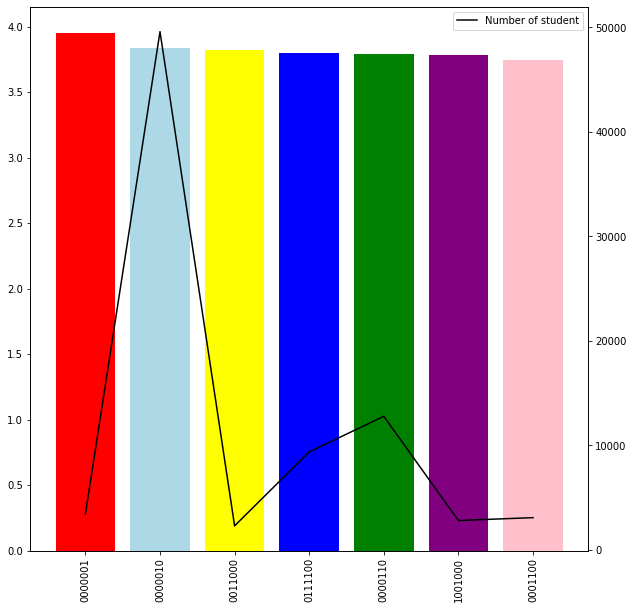

In [30]:
#PLot the first 7
plt.figure(figsize=(10,10))
plot1=plt.bar(dffoo.index,round(dffoo['GPA_mean'],3),label='GPA',color=['red', 'lightblue', 'yellow','blue','green','purple','pink'])
plt.xticks(dffoo.index, rotation='vertical')

x = dffoo.index
y = dffoo['num_student']
axes2 = plt.twinx()
axes2.plot(x, y, color='k', label='Number of student')
plt.legend()
plt.show()


## <span style="color: blue; font-size: 1em;"> Problem 3: Build a classsifier model for bussiness and science classes </span>
### a) Gaussian Naive Bayse

In [31]:
subjects=pd.read_csv("uw-madison-courses/subjects.csv")
subject_memberships=pd.read_csv("uw-madison-courses/subject_memberships.csv")
grade_distributions=pd.read_csv("uw-madison-courses/grade_distributions.csv")

In [32]:
grade_distributions=grade_distributions.dropna()
subjects=subjects.rename(columns={"code": "subject_code"})
subjects['subject_code']=subjects['subject_code'].astype(str)
subject_memberships['subject_code']=subject_memberships['subject_code'].astype(str)

df=pd.DataFrame({})
#Combine subject and subject member to df_temp2
df_temp2=subjects.merge(subject_memberships, on='subject_code')
#Combine Grade Dist and df_temp2 to df
df=df_temp2.merge(grade_distributions, on='course_offering_uuid')

In [33]:
df.head(2)

,subject_code,name,abbreviation,Department,course_offering_uuid,section_number,a_count,ab_count,b_count,bc_count,...,f_count,s_count,u_count,cr_count,n_count,p_count,i_count,nw_count,nr_count,other_count
0,908,Soil Science,SOIL SCI,SCI,838b5db0-676f-3063-a3f5-326b92bb8f59,1,15,11,25,0,...,3,0,0,0,0,0,1,0,0,0
1,908,Soil Science,SOIL SCI,SCI,8e77fe8b-6fb0-3297-8929-b95b2e4b9889,1,17,11,19,6,...,1,0,0,0,0,0,0,0,0,0


In [34]:
#Create df with only SCI and BUS department
dfNew=pd.DataFrame({})
print("SCI:",len(df[df['Department']=='SCI']),"BUS :",len(df[df['Department']=='BUS']))
#Select 2 target, science and bussiness
dfNew=df[(df['Department']=='SCI')|(df['Department']=='BUS')]

#Clean
dfNew=dfNew.drop(['name','subject_code','abbreviation','course_offering_uuid','section_number'],axis=1)

#Create new column
newCol=np.zeros(len(dfNew))
for i in dfNew.columns:
    if i != 'Department':
        dfNew[i].astype(int)
        newCol+=dfNew[i].values
dfNew['Total_student_enroll']=newCol

dfNew=dfNew[dfNew['Total_student_enroll']!=0]
dfNew.head()

SCI: 10459 BUS : 10286


,Department,a_count,ab_count,b_count,bc_count,c_count,d_count,f_count,s_count,u_count,cr_count,n_count,p_count,i_count,nw_count,nr_count,other_count,Total_student_enroll
0,SCI,15,11,25,0,13,8,3,0,0,0,0,0,1,0,0,0,76.0
1,SCI,17,11,19,6,3,0,1,0,0,0,0,0,0,0,0,0,57.0
2,SCI,7,16,14,0,14,5,4,2,0,0,0,0,0,0,0,0,62.0
3,SCI,10,12,22,0,12,6,4,0,0,0,0,0,0,0,0,0,66.0
4,SCI,14,19,22,4,8,3,0,0,0,0,0,0,0,0,0,0,70.0


In [339]:
#Normalize each column
for i in dfNew.columns:
    if  (i!='Department'):
        dfNew[i]=round(dfNew[i]/dfNew['Total_student_enroll'],4)
dfNew.head()

,Department,a_count,ab_count,b_count,bc_count,c_count,d_count,f_count,s_count,u_count,cr_count,n_count,p_count,i_count,nw_count,nr_count,other_count,Total_student_enroll
0,SCI,0.0026,0.0019,0.0043,0.0000,0.0023,0.0014,0.0005,0.0000,0.0,0.0,0.0,0.0,0.0002,0.0,0.0,0.0,1.0
1,SCI,0.0052,0.0034,0.0058,0.0018,0.0009,0.0000,0.0003,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,1.0
2,SCI,0.0018,0.0042,0.0036,0.0000,0.0036,0.0013,0.0010,0.0005,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,1.0
3,SCI,0.0023,0.0028,0.0050,0.0000,0.0028,0.0014,0.0009,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,1.0
4,SCI,0.0029,0.0039,0.0045,0.0008,0.0016,0.0006,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,1.0


### Train Test Split

In [340]:
#Make a new set of df for testing
df_temp1=dfNew[dfNew['Department']=='SCI'].sample(200)
df_temp1['Department']=np.zeros(len(df_temp1))

df_temp2=dfNew[dfNew['Department']=='BUS'].sample(200)
df_temp2['Department']=np.ones(len(df_temp2))

list_Dep=df_test['Department'].unique()
df_test=pd.concat([df_temp1,df_temp2],ignore_index=True)
df_test.head()

,Department,a_count,ab_count,b_count,bc_count,c_count,d_count,f_count,s_count,u_count,cr_count,n_count,p_count,i_count,nw_count,nr_count,other_count,Total_student_enroll
0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,1.0
1,0.0,0.0089,0.0014,0.0034,0.0003,0.0017,0.0007,0.0003,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0017,1.0
2,0.0,0.0038,0.0010,0.0018,0.0000,0.0003,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,1.0
3,0.0,0.0012,0.0007,0.0007,0.0005,0.0002,0.0001,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,1.0
4,0.0,0.0988,0.0000,0.0123,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,1.0


In [341]:
X=df_test.drop(['Department'],axis=1)
y=df_test['Department']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

train_df = pd.concat([X_train, y_train], axis=1) 
test_df = pd.concat([X_test, y_test], axis=1)

train_df.head()

,a_count,ab_count,b_count,bc_count,c_count,d_count,f_count,s_count,u_count,cr_count,n_count,p_count,i_count,nw_count,nr_count,other_count,Total_student_enroll,Department
58,0.0617,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38,0.1111,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
352,0.0434,0.0021,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
391,0.0104,0.0055,0.0042,0.0028,0.0021,0.0,0.0,0.0014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
21,0.0139,0.0104,0.0139,0.0035,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [342]:
#Note that the test set use the mean and std from the train set. 
aggs=train_df.groupby('Department').agg(['mean','std'])
aggs.head()

a_count            ab_count             b_count            \
                mean       std      mean       std      mean       std   
Department                                                               
0.0         0.032706  0.039635  0.007896  0.011219  0.007036  0.011166   
1.0         0.019608  0.026915  0.007308  0.007626  0.005292  0.006743   

            bc_count             c_count            ...   i_count            \
                mean       std      mean       std  ...      mean       std   
Department                                          ...                       
0.0         0.001255  0.002645  0.001610  0.005431  ...  0.000807  0.004347   
1.0         0.001221  0.002087  0.000939  0.001771  ...  0.000057  0.000483   

            nw_count            nr_count           other_count           \
                mean       std      mean       std        mean      std   
Department                                                                
0.0         0.000231  0.001820  0.000715  0.004698    0.000039  0.00035   
1.0         0.000025  0.000307  0.000023  0.000203    0.000003  0.00004   

           Total_student_enroll       
                           mean  std  
Department                            
0.0                         1.0  0.0  
1.0                         1.0  0.0  

[2 rows x 34 columns]

#### Point estimation function
$$ \large P(x_i|y_j) = \frac{1}{\sqrt{2 \pi \sigma_i^2}}e^{\frac{-(x_i-\mu_i)^2}{2\sigma_i^2}}$$
where $\mu_i$ and $\sigma_i$ is mean and std of feature $x_i$ in class $y_j$ 

In [343]:
def p_xi_given_class_GaussNB(obs_row,feature,class_):
    mu= aggs[feature]['mean'][class_]
    std=aggs[feature]['std'][class_]
    xi=obs_row[feature]
    return stats.norm.pdf(xi,mu,std)

#### Predict class function

$$ \large P(y|x_1,x_2,...x_n) = \frac{P(y)\prod_{i}^{n}P(x_i|y)}{P(x_1,x_2,...x_n)}$$ 


In [445]:
#Find all P(y_i|x_i's) in each row and append them in an array. In this case, array of length 2.
# Return the index of the largest value in that array
def predict_class_GaussNB(obs_row): #Note that obs_row = X.iloc(row)
    prod_c_i=[]
    for c_i in range(len(aggs)):
        p_y=len(train_df[train_df['Department']==c_i])/len(train_df)
        for feature in X_train.columns:
            p_y*=p_xi_given_class_GaussNB(obs_row,feature,c_i )
        prod_c_i.append(p_y)
    return np.argmax(prod_c_i)

In [446]:
#Store the respond 
y_hat_train = [predict_class_GaussNB(X_train.iloc[idx]) for idx in range(len(X_train))]
y_hat_test=[predict_class_GaussNB(X_test.iloc[idx]) for idx in range(len(X_test))]

/Users/huybui/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1720: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/huybui/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1720: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


In [447]:
residue_train = y_hat_train==y_train
acc_train= residue_train.sum()/len(y_train)

residue_test=y_hat_test==y_test
acc_test= residue_test.sum()/len(y_test)

print("Train accuracy: {}, Test accuracy: {}".format(acc_train,acc_test))


Train accuracy: 0.49, Test accuracy: 0.53


In [449]:
#Alternatively, one can use sklearn build in function

from sklearn.naive_bayes import GaussianNB
#.fit: Fit Gaussian Naive Bayes according to X, y
#.predict() :Perform classification on an array of test vectors X.
y_pred_train=GaussianNB().fit(X_train, y_train).predict(X_train) #Optional
y_pred_test = GaussianNB().fit(X_train, y_train).predict(X_test)

print("Accuracy for train set:", ((y_pred_train==y_train).sum())/X_train.shape[0]) #Optional
print("Accuracy for predict set:", ((y_pred_test==y_test).sum())/X_test.shape[0])

Accuracy for train set: 0.6066666666666667
Accuracy for predict set: 0.49


### b) Naive Bayes

#### Tweak
The only different between NB and GaussNB is the **point estimation function :$P(x_i|class)$**

$$ \large P(x_i|y_j) = \text{number of frequency of $x_i$ in class $y_j$}$$

We will first define the number of our bins, the location. We can control this parameter
After that, we count the number of frequency of a value **base on how many other values within its bin**.


In [450]:
N=int(len(train_df)/10) #Number of bins, can control
bin_end_list=np.linspace(0, 1, N,endpoint=True)
bin_list=[(round(bin_end_list[i],4),round(bin_end_list[i+1],4)) for i in range(len(bin_end_list)-1)]

data={}
frequency_bag=pd.DataFrame({})

#Loop that count the number of values for each bins
#These values also serves as the frequency of values within its range
#Example: if [0,0.1] has [0,1,0.013], then frequency of 0.1 or 0.013is both 2

for class_ in train_df['Department'].unique():
    
    frequency_bag['bin_list']=bin_list
    for feature in X_train.columns:

        data=train_df[train_df['Department']==class_][feature]
        freq_array=[]
                                                             
        for bin_ in bin_list:
            num_freq=0
            
            for value in data:
                if (value>=bin_[0])&(value<=bin_[1]):
                    num_freq+=1
            freq_array.append(num_freq)
        frequency_bag[feature+'_Freq_'+str(int(class_))]= freq_array

In [451]:
#Point estimation function
#Return the result of 
def p_xi_given_class_NB(obs_row,feature,class_): 

    bin_=bin_location(obs_row[feature])
    num=list(frequency_bag[frequency_bag['bin_list']==bin_][feature+'_Freq_'+str(class_)])[0]
    denom=frequency_bag[feature+'_Freq_'+str(class_)]
    result=num/denom
    return result

In [452]:
#Return the department with higher probability
def predict_class_NB(obs_row): #Note that obs_row = X.iloc(row)
    prod_c_i=[]
    for c_i in range(len(aggs)):
        p_y=len(train_df[train_df['Department']==c_i])/len(train_df)
        for feature in X_train.columns:
            p_y*=p_xi_given_class_NB(obs_row,feature,c_i )
        prod_c_i.append(p_y)
    return np.argmax(prod_c_i)

In [453]:
#Return the bin where x_i located
def bin_location(x_i):
    for bin_ in bin_list:
        if (x_i>=bin_[0])&(x_i<=bin_[1]):
            return bin_

In [454]:
#Store the respond 
y_hat_train = [predict_class_NB(X_train.iloc[idx]) for idx in range(len(X_train))]
y_hat_test=[predict_class_NB(X_test.iloc[idx]) for idx in range(len(X_test))]

In [455]:
residue_train = y_hat_train==y_train
acc_train= residue_train.sum()/len(y_train)

residue_test=y_hat_test==y_test
acc_test= residue_test.sum()/len(y_test)

print("Train accuracy: {}, Test accuracy: {}".format(acc_train,acc_test))


Train accuracy: 0.4266666666666667, Test accuracy: 0.51


## <span style="color: blue; font-size: 1em;"> Problem 4: Get data for visualization in Tableau </span>

In [ ]:
courses=pd.read_csv("uw-madison-courses/courses.csv")
course_offerings=pd.read_csv("uw-madison-courses/course_offerings.csv")
grade_distributions=pd.read_csv("uw-madison-courses/grade_distributions.csv")
instructors=pd.read_csv("uw-madison-courses/instructors.csv")
rooms=pd.read_csv("uw-madison-courses/rooms.csv")
schedules=pd.read_csv("uw-madison-courses/schedules.csv")
sections=pd.read_csv("uw-madison-courses/sections.csv")
subject_memberships=pd.read_csv("uw-madison-courses/subject_memberships.csv")
teachings=pd.read_csv("uw-madison-courses/teachings.csv")

In [456]:
dffoo

,GPA_mean,num_student
day_code,,
0000001,3.951740,3432
0000010,3.839045,49584
0011000,3.824386,2311
0111100,3.798235,9386
0000110,3.794326,12786
1001000,3.785087,2822
0001100,3.745905,3095


In [ ]:
df_GPA=